1. Importing Required Libraries

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

2. Importing the dataset

In [3]:
df = pd.read_csv('../dataset/Dataset_1.csv',sep=';')
df.head()

/Users/punsisikiridana/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


3. Preparation of Date Time Column

In [4]:
df['Date'] =  pd.to_datetime(df['Date'],format="%d.%m.%Y %H:%M")

df.set_index(df['Date'],inplace=True)

df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
Date,,,,,,,
2010-12-01 08:26:00,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,"2,55",17850.0,United Kingdom
2010-12-01 08:26:00,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2010-12-01 08:26:00,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,"2,75",17850.0,United Kingdom
2010-12-01 08:26:00,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom
2010-12-01 08:26:00,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,"3,39",17850.0,United Kingdom


4. Calculating the total oder amount

In [5]:
df['Price'] = df['Price'].str.replace(',', '.')
df['Total'] = df['Quantity'].astype(float) * df['Price'].astype(float)
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Total
Date,,,,,,,,
2010-12-01 08:26:00,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


5. Calculating the total sales per day

In [6]:
daily_sales = df.groupby(df.index.date)['Total'].sum().reset_index()
daily_sales.columns = ['Date', 'Sales']
daily_sales.head()

,Date,Sales
0,2010-12-01,58405.41
1,2010-12-02,47725.88
2,2010-12-03,44366.86
3,2010-12-05,31774.95
4,2010-12-06,53647.96


6. Plotting the total sales per day

<AxesSubplot:ylabel='Sales'>

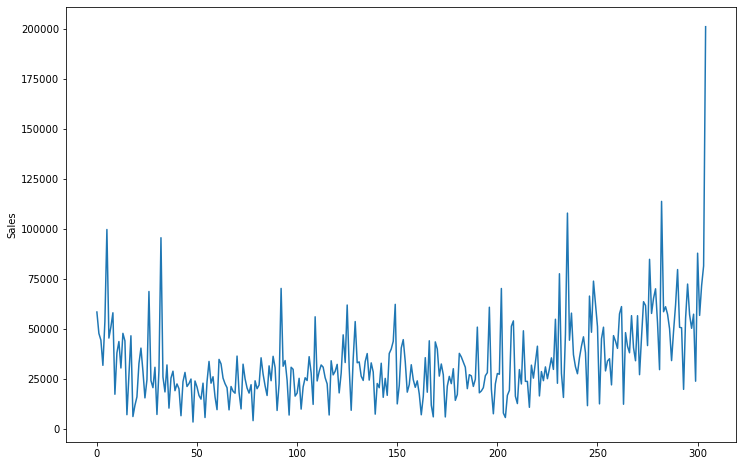

In [7]:

plt.figure(figsize=(12,8))
sns.lineplot(data=daily_sales, x=daily_sales.index, y=daily_sales.Sales)

7. Function to check stationarity

In [8]:
def check_stationarity(df , param):
    stationarity=False
    adfTest = adfuller(daily_sales['Sales'], autolag='AIC')
    stats = pd.Series(adfTest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    print(stats)
    for key,values in adfTest[4].items():
        print("Criticallity ",key," : ",values)
        if(float(values)>float(adfTest[0])):
            stationarity=True
            break
    if(stationarity==False and adfTest[1]<=0.05):
        stationarity=True
    df['rollMean'] = df[param].rolling(window=7).mean()
    df['rollStd']= df[param].rolling(window=7).std()
    plt.figure(figsize=(15,10))
    sns.lineplot(data=df, x=df.index, y=df.Sales)
    sns.lineplot(data=df,x=df.index, y=df.rollMean)
    sns.lineplot(data=df,x=df.index, y=df.rollStd)
    print("Stationarity: ",stationarity)
    return stationarity

Test Statistic                   0.095557
p-value                          0.965756
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

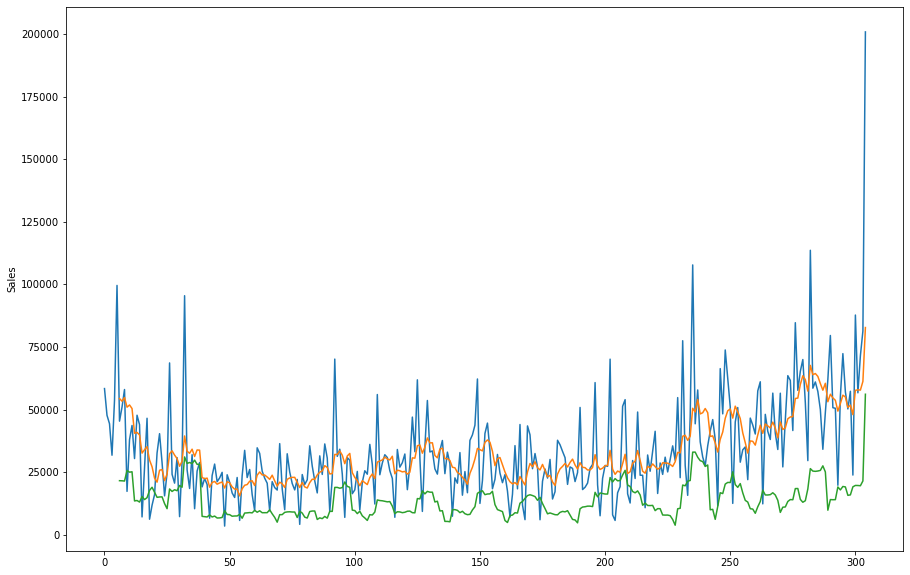

In [9]:
check_stationarity(daily_sales,'Sales')

Test Statistic                   0.095557
p-value                          0.965756
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

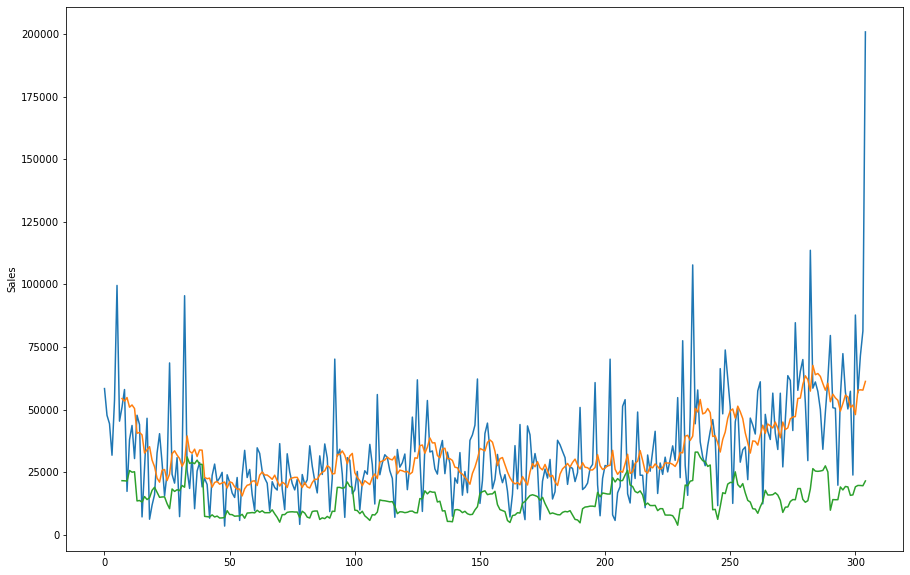

In [12]:
daily_sales['shift']=daily_sales['Sales'].shift()
check_stationarity(daily_sales,'shift')

Test Statistic                   0.095557
p-value                          0.965756
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

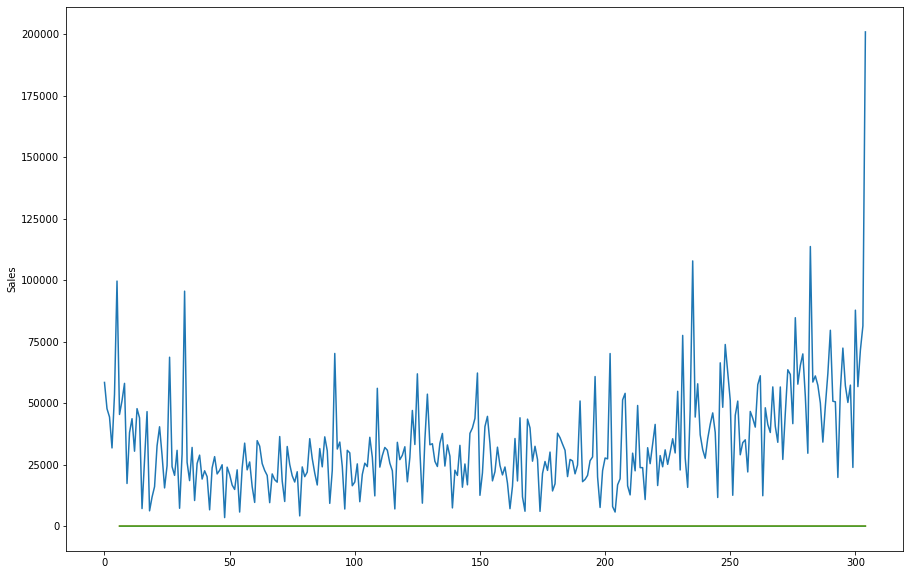

In [13]:
daily_sales['log_sales']=daily_sales['Sales'].apply(lambda x: np.log(x))
check_stationarity(daily_sales,'log_sales')

Test Statistic                   0.095557
p-value                          0.965756
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

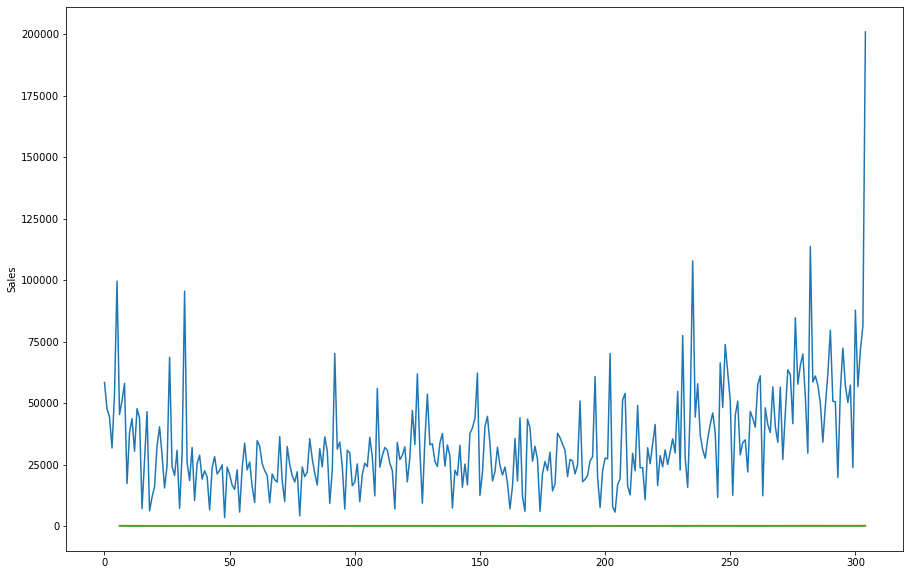

In [15]:
daily_sales['sqrt_sales'] = np.sqrt(daily_sales['Sales'])
check_stationarity(daily_sales,'sqrt_sales')

Test Statistic                   0.095557
p-value                          0.965756
Lags Used                       11.000000
Number of Observations Used    293.000000
dtype: float64
Criticallity  1%  :  -3.452867117291862
Criticallity  5%  :  -2.8714554160827745
Criticallity  10%  :  -2.5720532321867466
Stationarity:  False


False

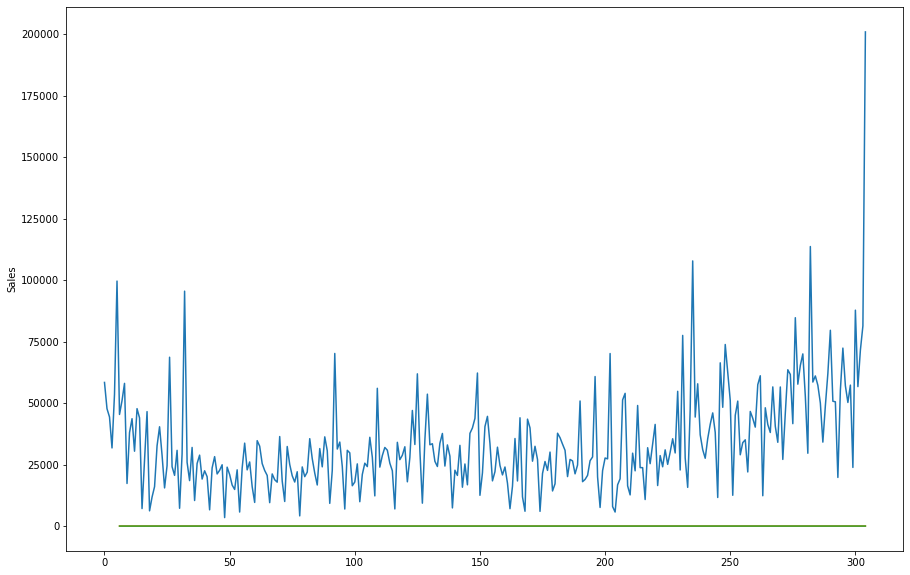

In [16]:
daily_sales['cbrt_sales'] = np.cbrt(daily_sales['Sales'])
check_stationarity(daily_sales,'cbrt_sales')